## Connor Tou | Lab 5

**Will the AND-1 riboswitch cleave itself when both of its OBS are bound?**
* Yes. If both OBS-1 and OBS-2 are bound, both gates are TRUE to this AND gate. Thus, the output is TRUE. The self-cleavage regions are bound to eachother and self-cleavage will occur. 

**Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?**
* No. If neither OBS are bound, then both inputs to this OR gate is FALSE. Thus, the output will be FALSE. No self-cleavage will occur. 

**What behavior do we expect from the YES-1 riboswitch?**
* If the OBS is bound, the input to this YES gate is TRUE, the output is TRUE, and self-cleavage will occur. If the OBS is not bound, the input to this YES gate is FALSE, the output is FALSE, and no clevage will occur. 

### Finding the sequences

All information obtained from the sequence is summarized into the table below:

| Riboswitch name | Start OBS-1  | End OBS-1 | Start OBS-2 | End OBS-2 | Start red1 | End red1 | Start red2 | End red2 |Sequence|
|------|------|------|------|------|------|------|------|------|------|
|   YES-1 | 26|47|NA|NA|16|21|49|54|GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC|
|   NOT-1  | 44|66|NA|NA|40|43| 74|77|GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC|
|   AND-1 |30|45|49|64|16|23|70|77|GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU|
|OR-1 |27|46|47|66|16|26|67|77|GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC|

### Writing a routine to fold RNA

In [8]:
import subprocess

seqs = \
"""
>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@
"""

p = subprocess.run(['RNAfold'],
                   input=bytes(seqs,'ascii'),
                  stdout=subprocess.PIPE,
                  stderr=subprocess.PIPE)

print("*** as seen in terminal ***")
print(p.stderr.decode())

print("*** as seen in output file ***")
print(p.stdout.decode())

*** as seen in terminal ***

*** as seen in output file ***
>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



## The Meat of the Assignment

### Plotting With Default Parameters

### YES-1

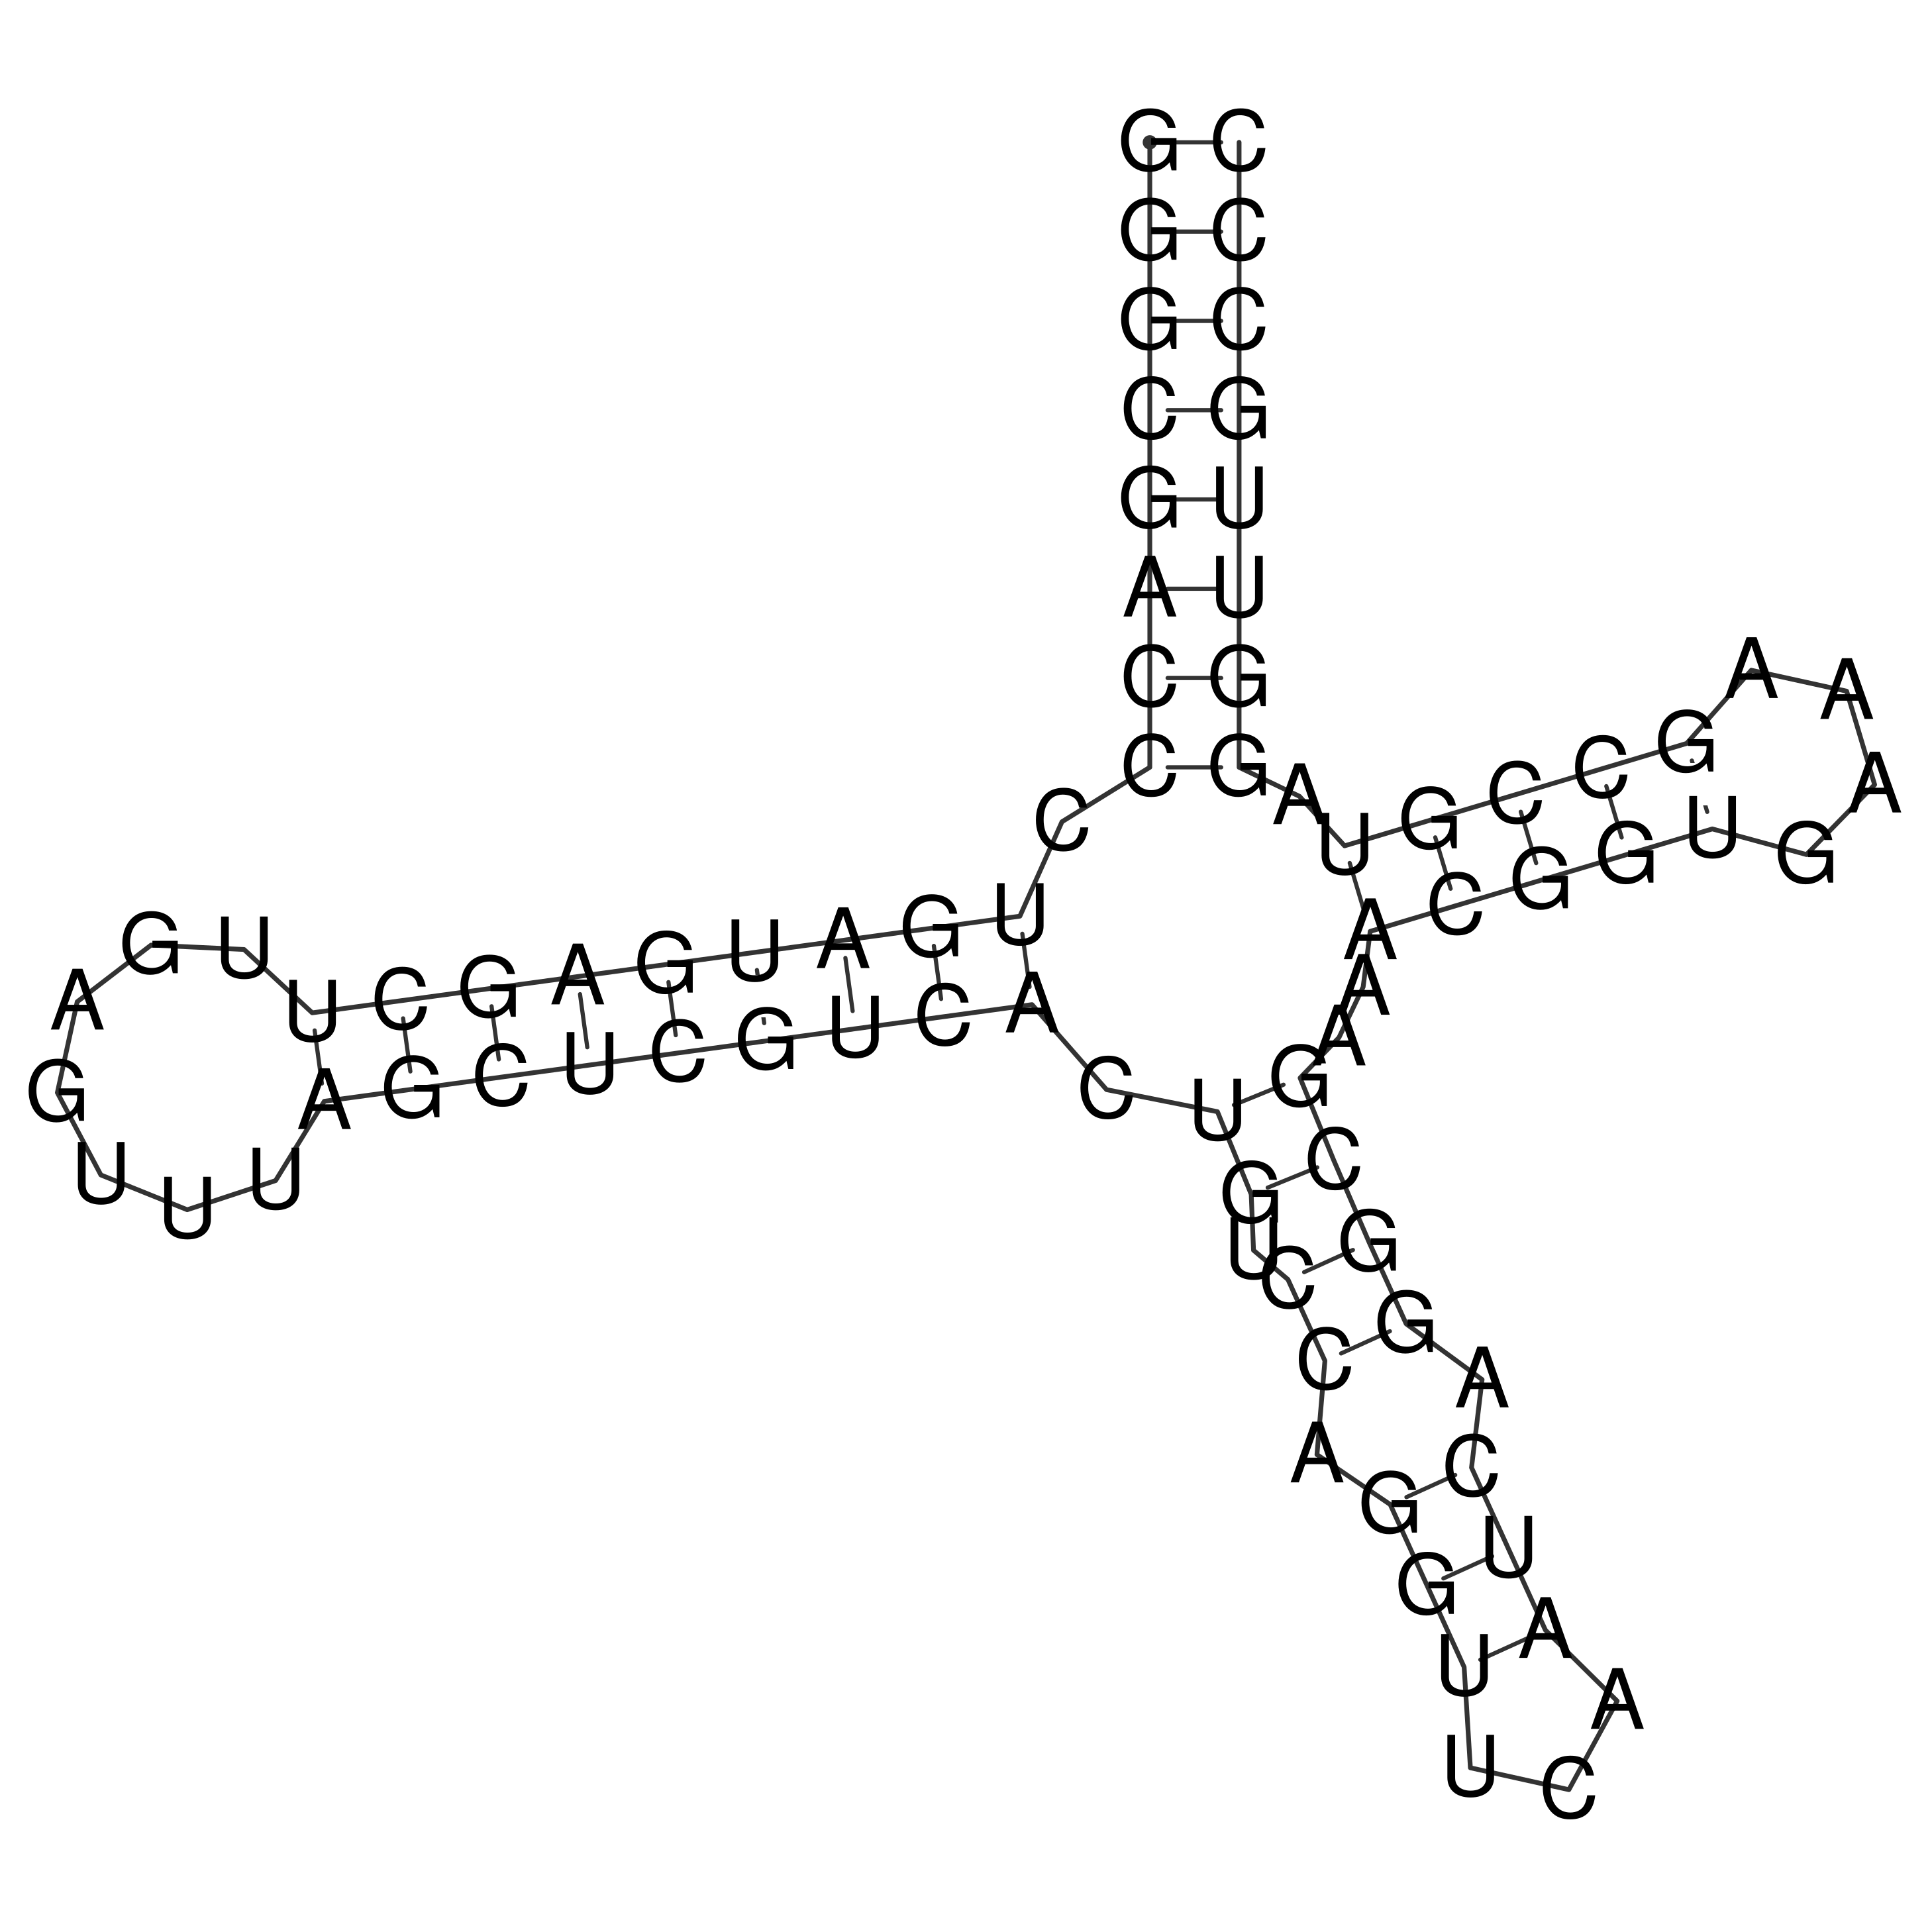

In [2]:
from IPython.display import Image
Image(filename='YES-1_ss.png')

### NOT-1

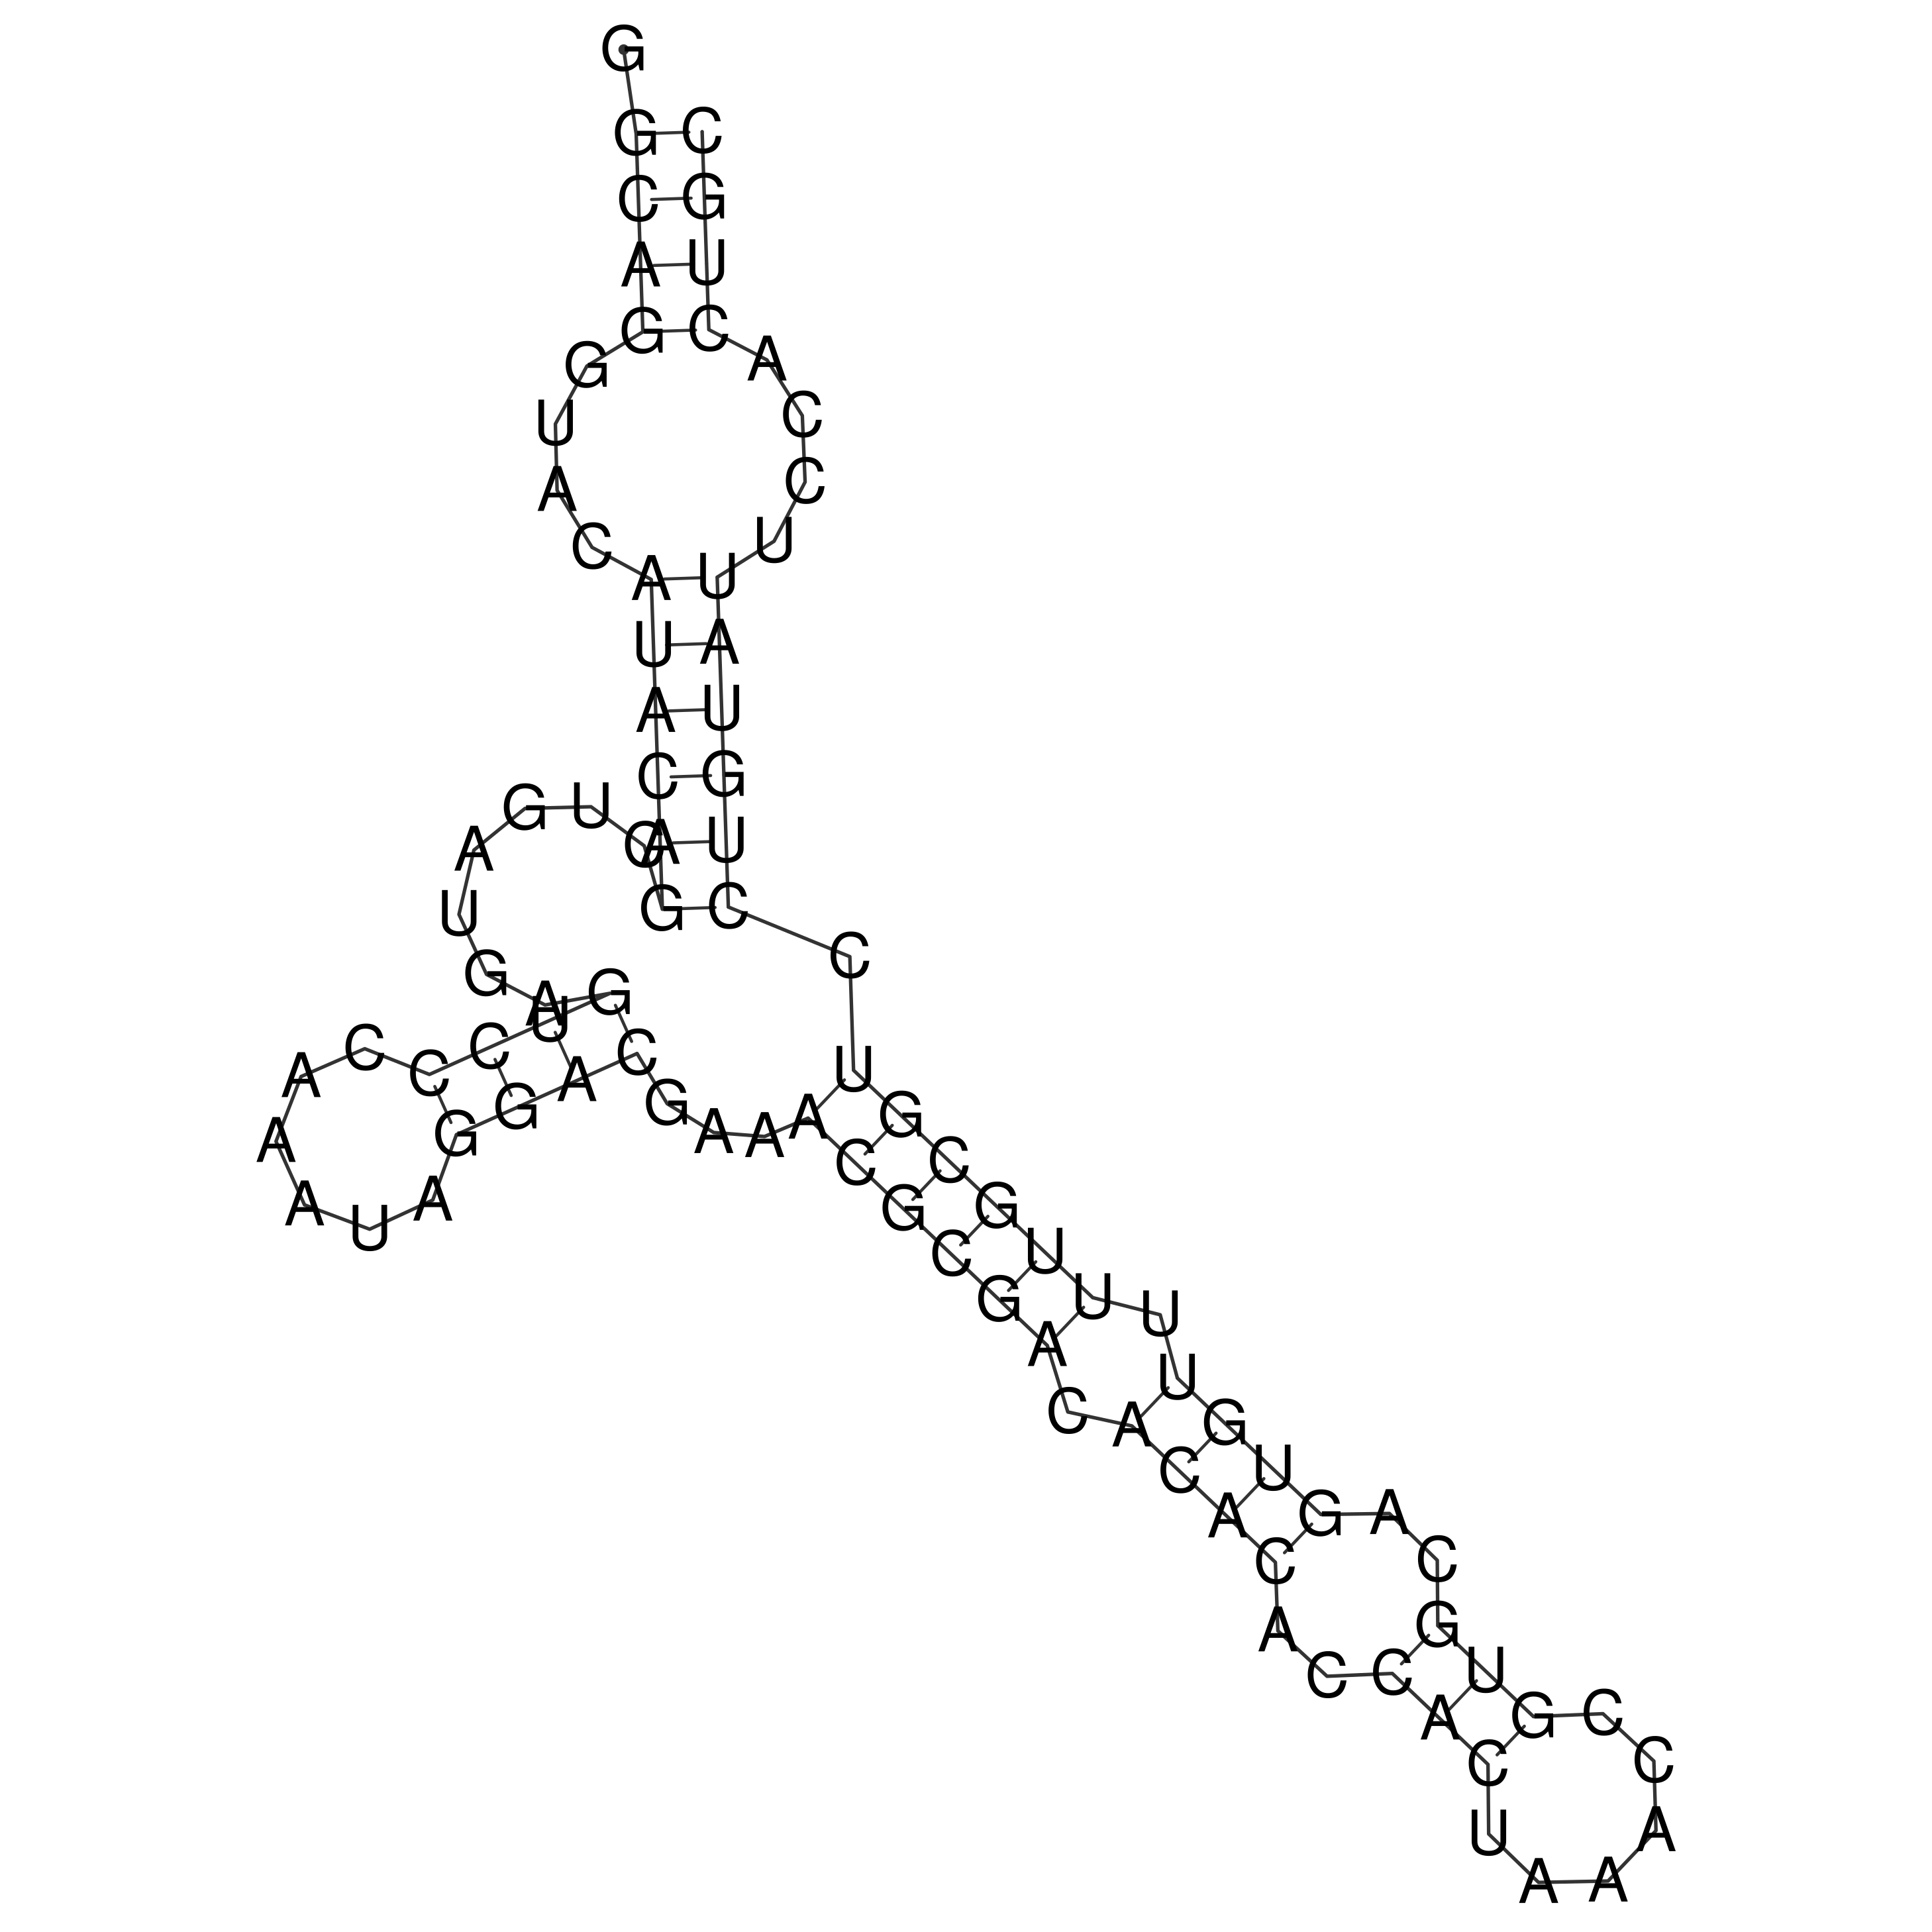

In [17]:
Image(filename='NOT-1_ss.png')

### AND-1

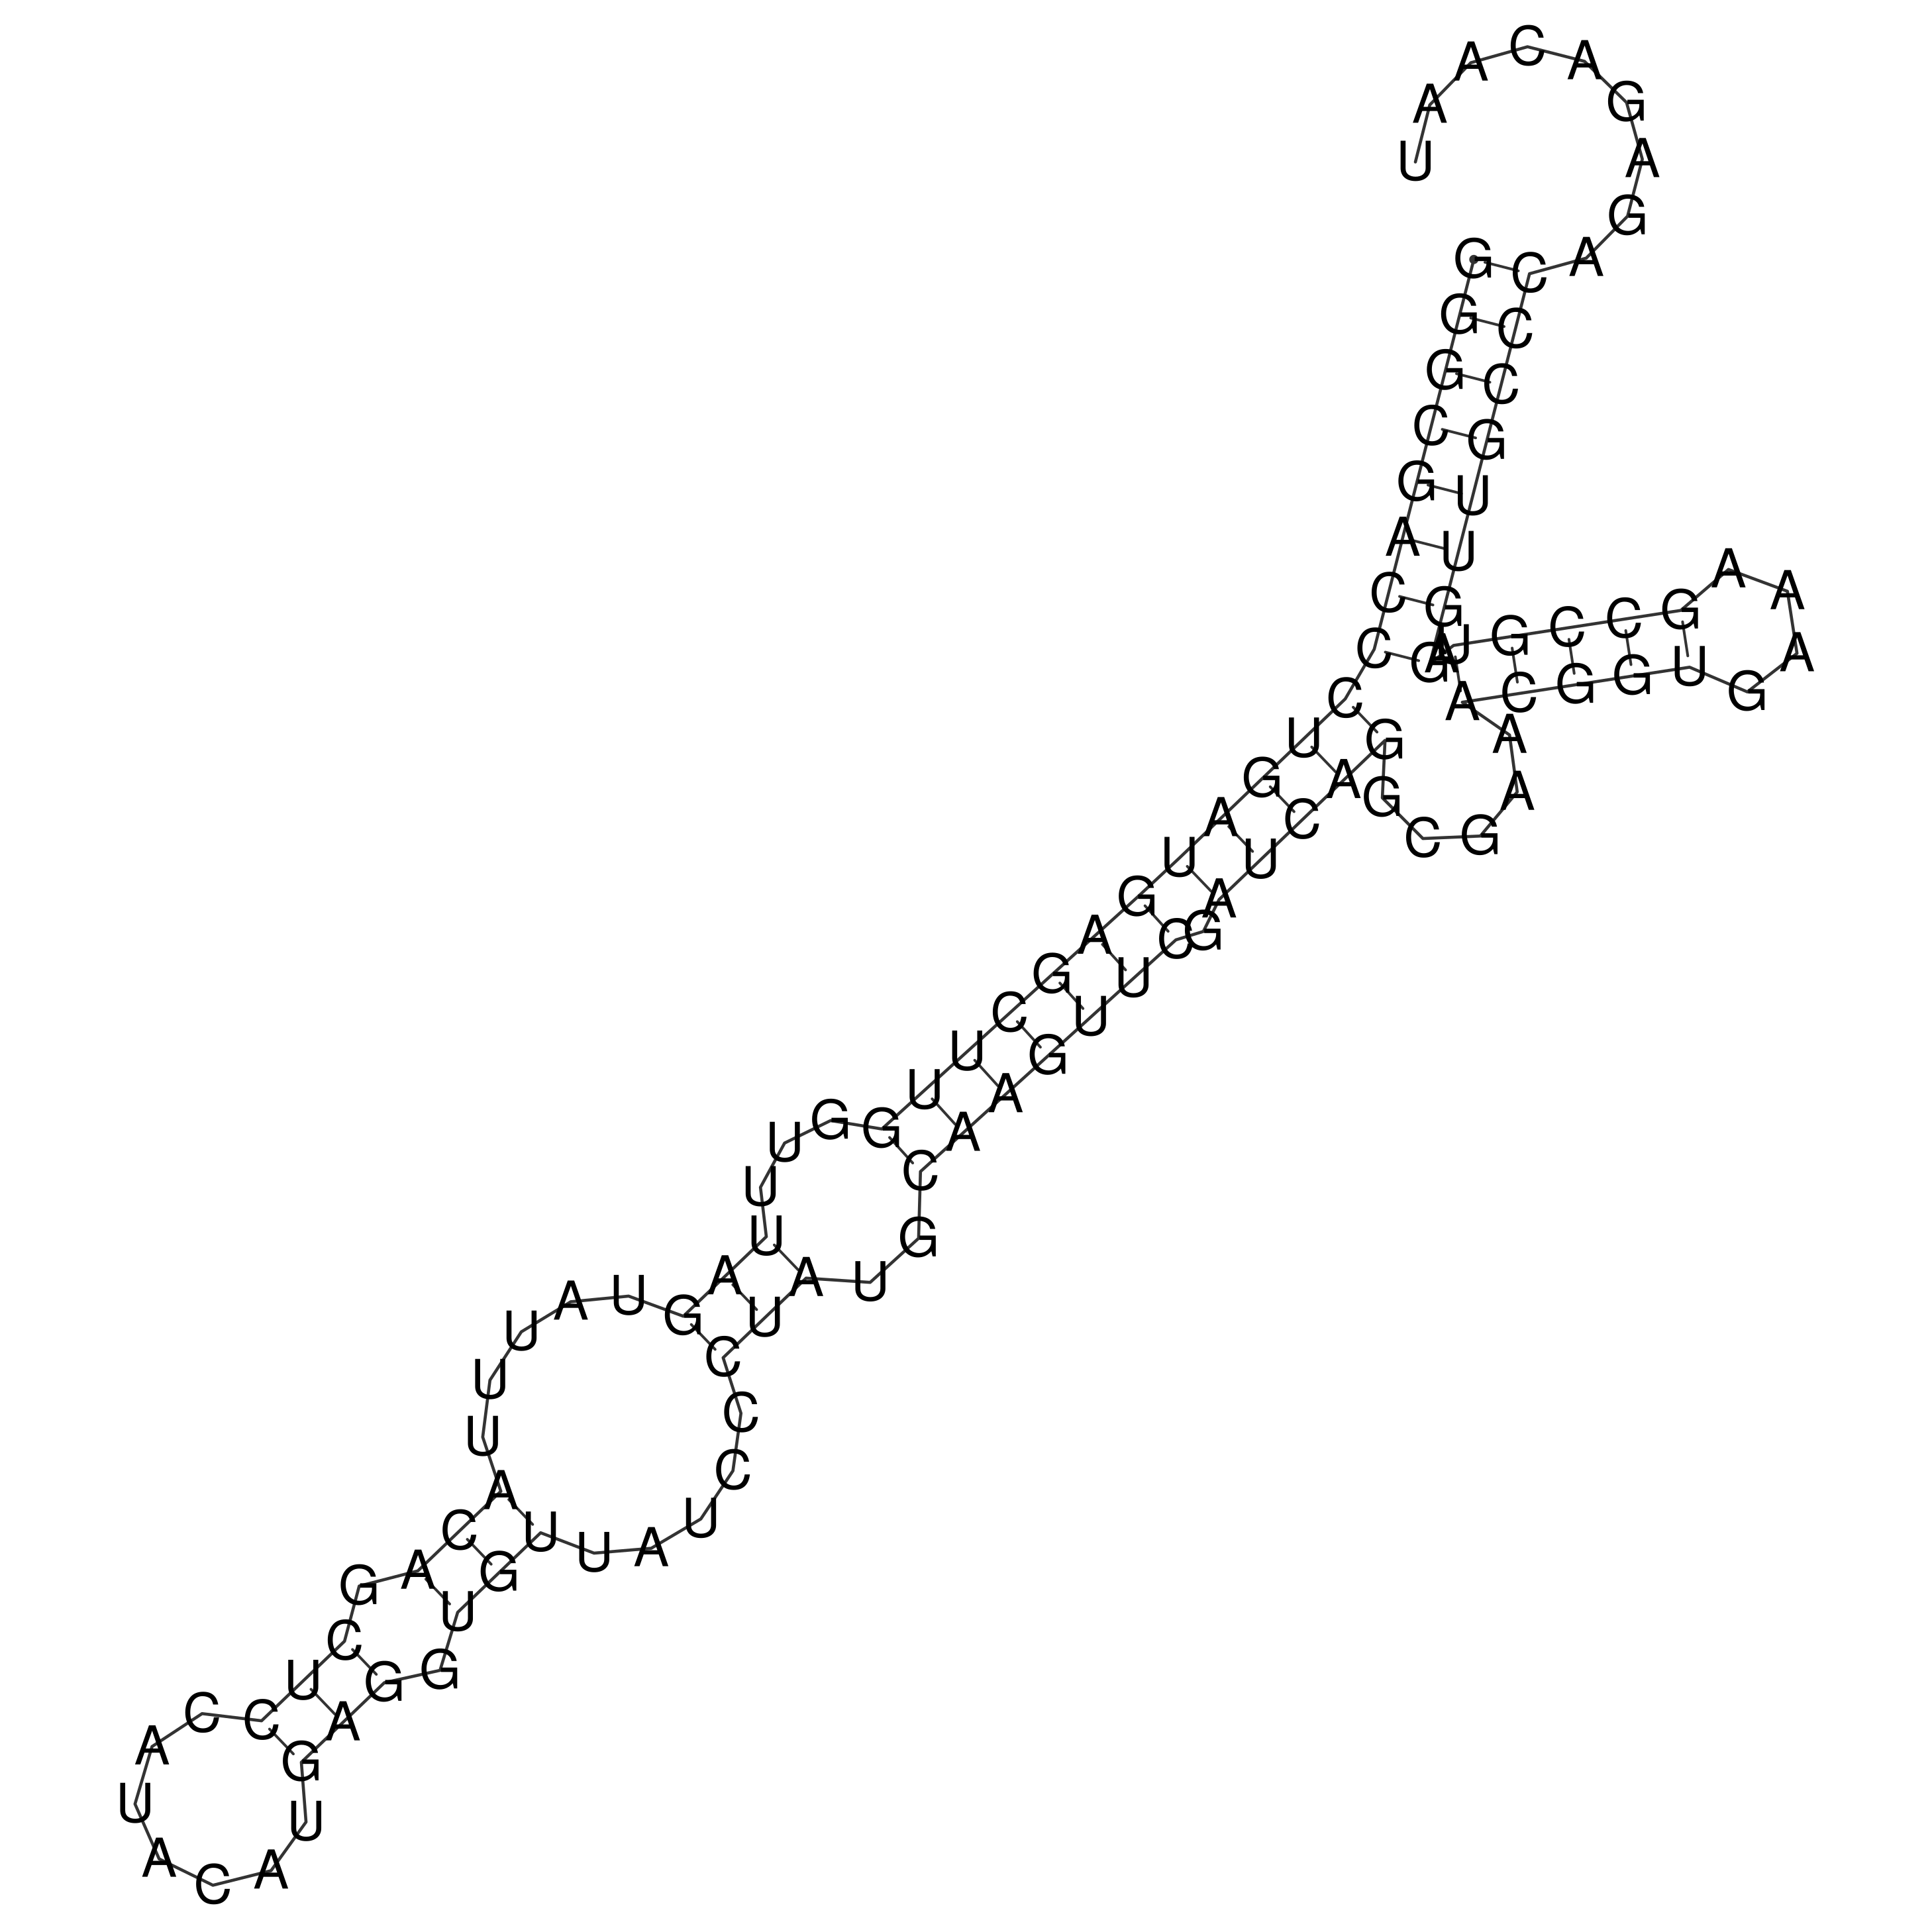

In [20]:
Image(filename='AND-1_ss.png')

### OR-1

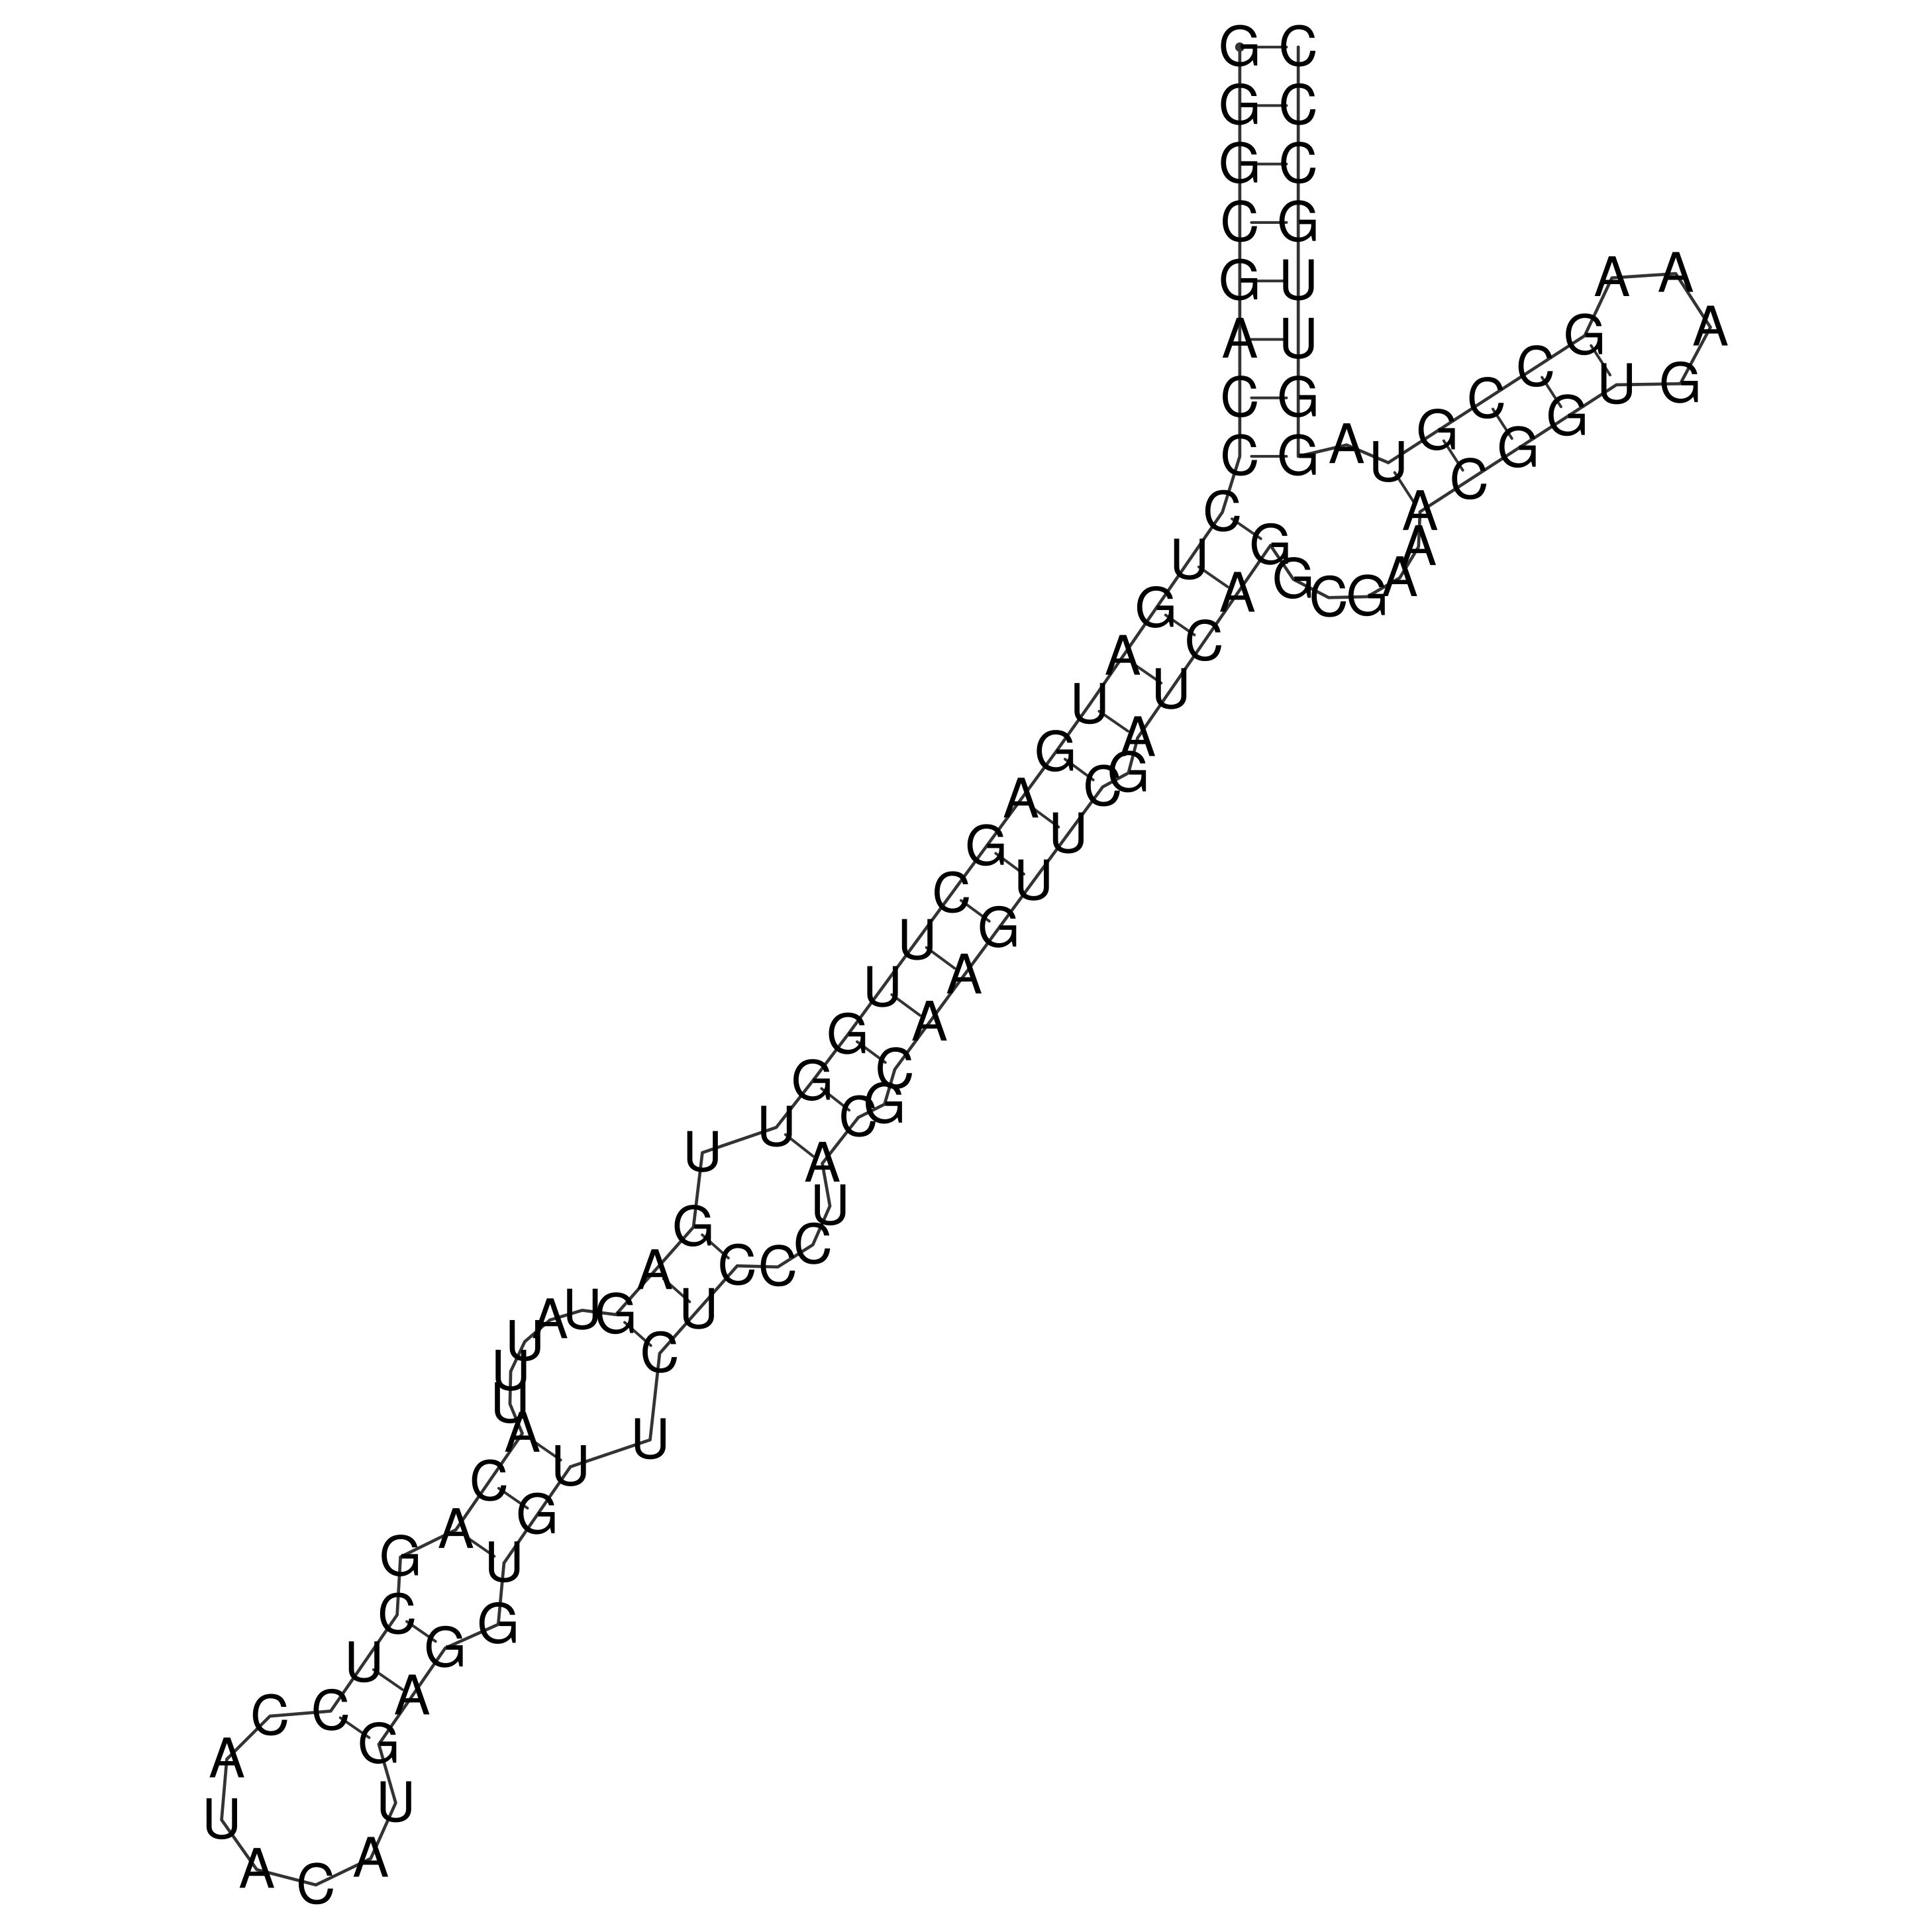

In [21]:
Image(filename='OR-1_ss.png')

#### Are they the same? Are they different? Are there any stem-loop structures that don’t match up? What might explain the differences?
* The RNA plots are the same as those in the publication (Penchovsky & Breaker provided) for NOT-1, AND-1 and OR-1. For YES-1, the publication shows 3 stem loops whereas our simulation shows 4 stem loop. This is due to temperature. As shown below, lowering the temperature to 5 degrees celsius gave the same results as Penchovsky & Breaker. 

### The Effect of Temperature on Folding

As stated above, lowering the temperature to 5 degrees celsius gave the same results as the publication. See below. 

In [4]:
seqs = \
""">YES-1_TEMP5
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>NOT-1_TEMP5
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>AND-1_TEMP5
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>OR-1_TEMP5
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@
"""

p = subprocess.run(['RNAfold', '--temp=5'],
                   input=bytes(seqs,'ascii'),
                  stdout=subprocess.PIPE,
                  stderr=subprocess.PIPE)

print("*** Terminal output ***")
print(p.stderr.decode())

print("*** Output file ***")
print(p.stdout.decode())

*** Terminal output ***

*** Output file ***
>YES-1_TEMP5
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((.(..(((.......))).)))))))).))))).....(((((....))))).)))))))) (-53.19)
>NOT-1_TEMP5
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....(((((((....).((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-51.78)
>AND-1_TEMP5
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-70.09)
>OR-1_TEMP5
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(.(.....(((.(((.((....))))).)))...).).)).))))))..))))))....(((((....))))).)))))))) (-63.51)



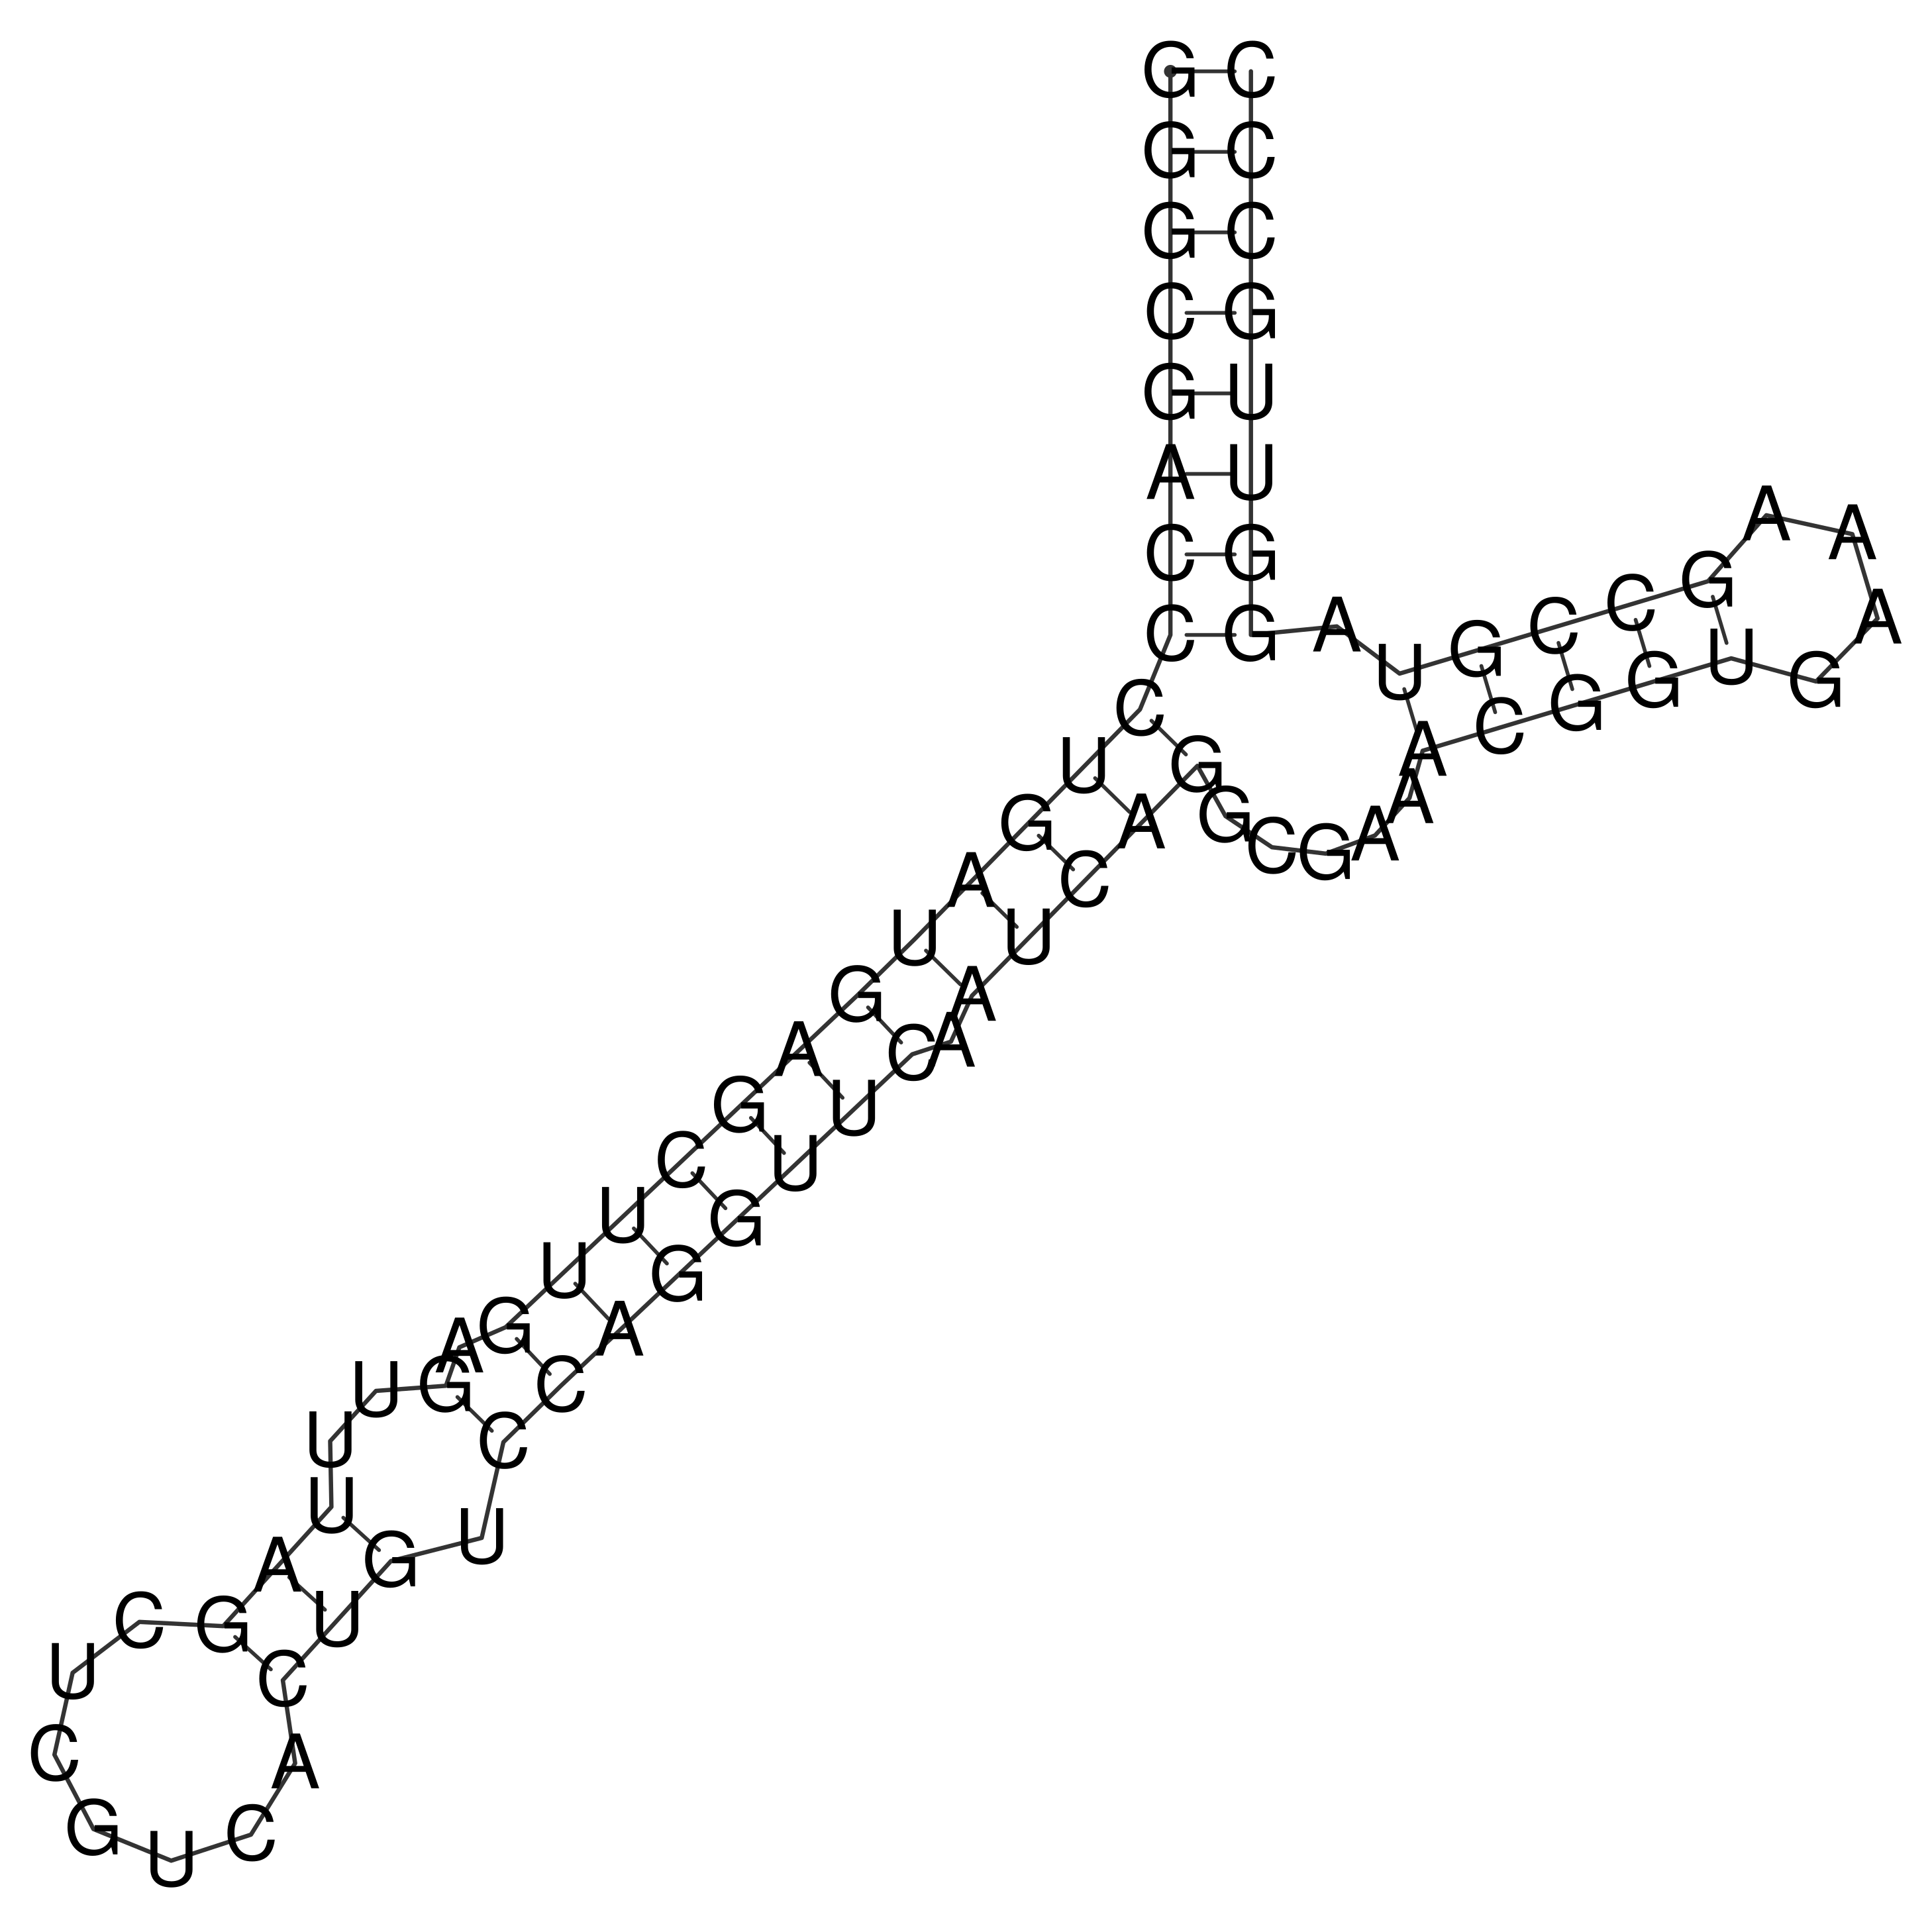

In [6]:
from IPython.display import Image
Image(filename='YES-1_TEMP5_ss.png')

## Folding with OBS binding constraints

### YES-1 CONSTRAINED

In [8]:
#YES-1 constrained
seq = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
bstart = 26
bend = 47
end = len(seq)

string = ">YES-1_OBS\n" +seq+"\n"

for i in range(bstart):
    string += "."    
for i in range(bstart, bend+1):
    string += "x"    
for i in range(bend+1, end):
    string += "." 

string += "\n>@"
    
p = subprocess.run(['RNAfold', '-C'],
                       input=bytes(string, 'ascii'),
                      stdout=subprocess.PIPE,
                      stderr=subprocess.PIPE)

# print(string)
print("*** Terminal output ***")
print(p.stderr.decode())

print("*** Output file ***")
print(p.stdout.decode())

*** Terminal output ***

*** Output file ***
>YES-1_OBS
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)



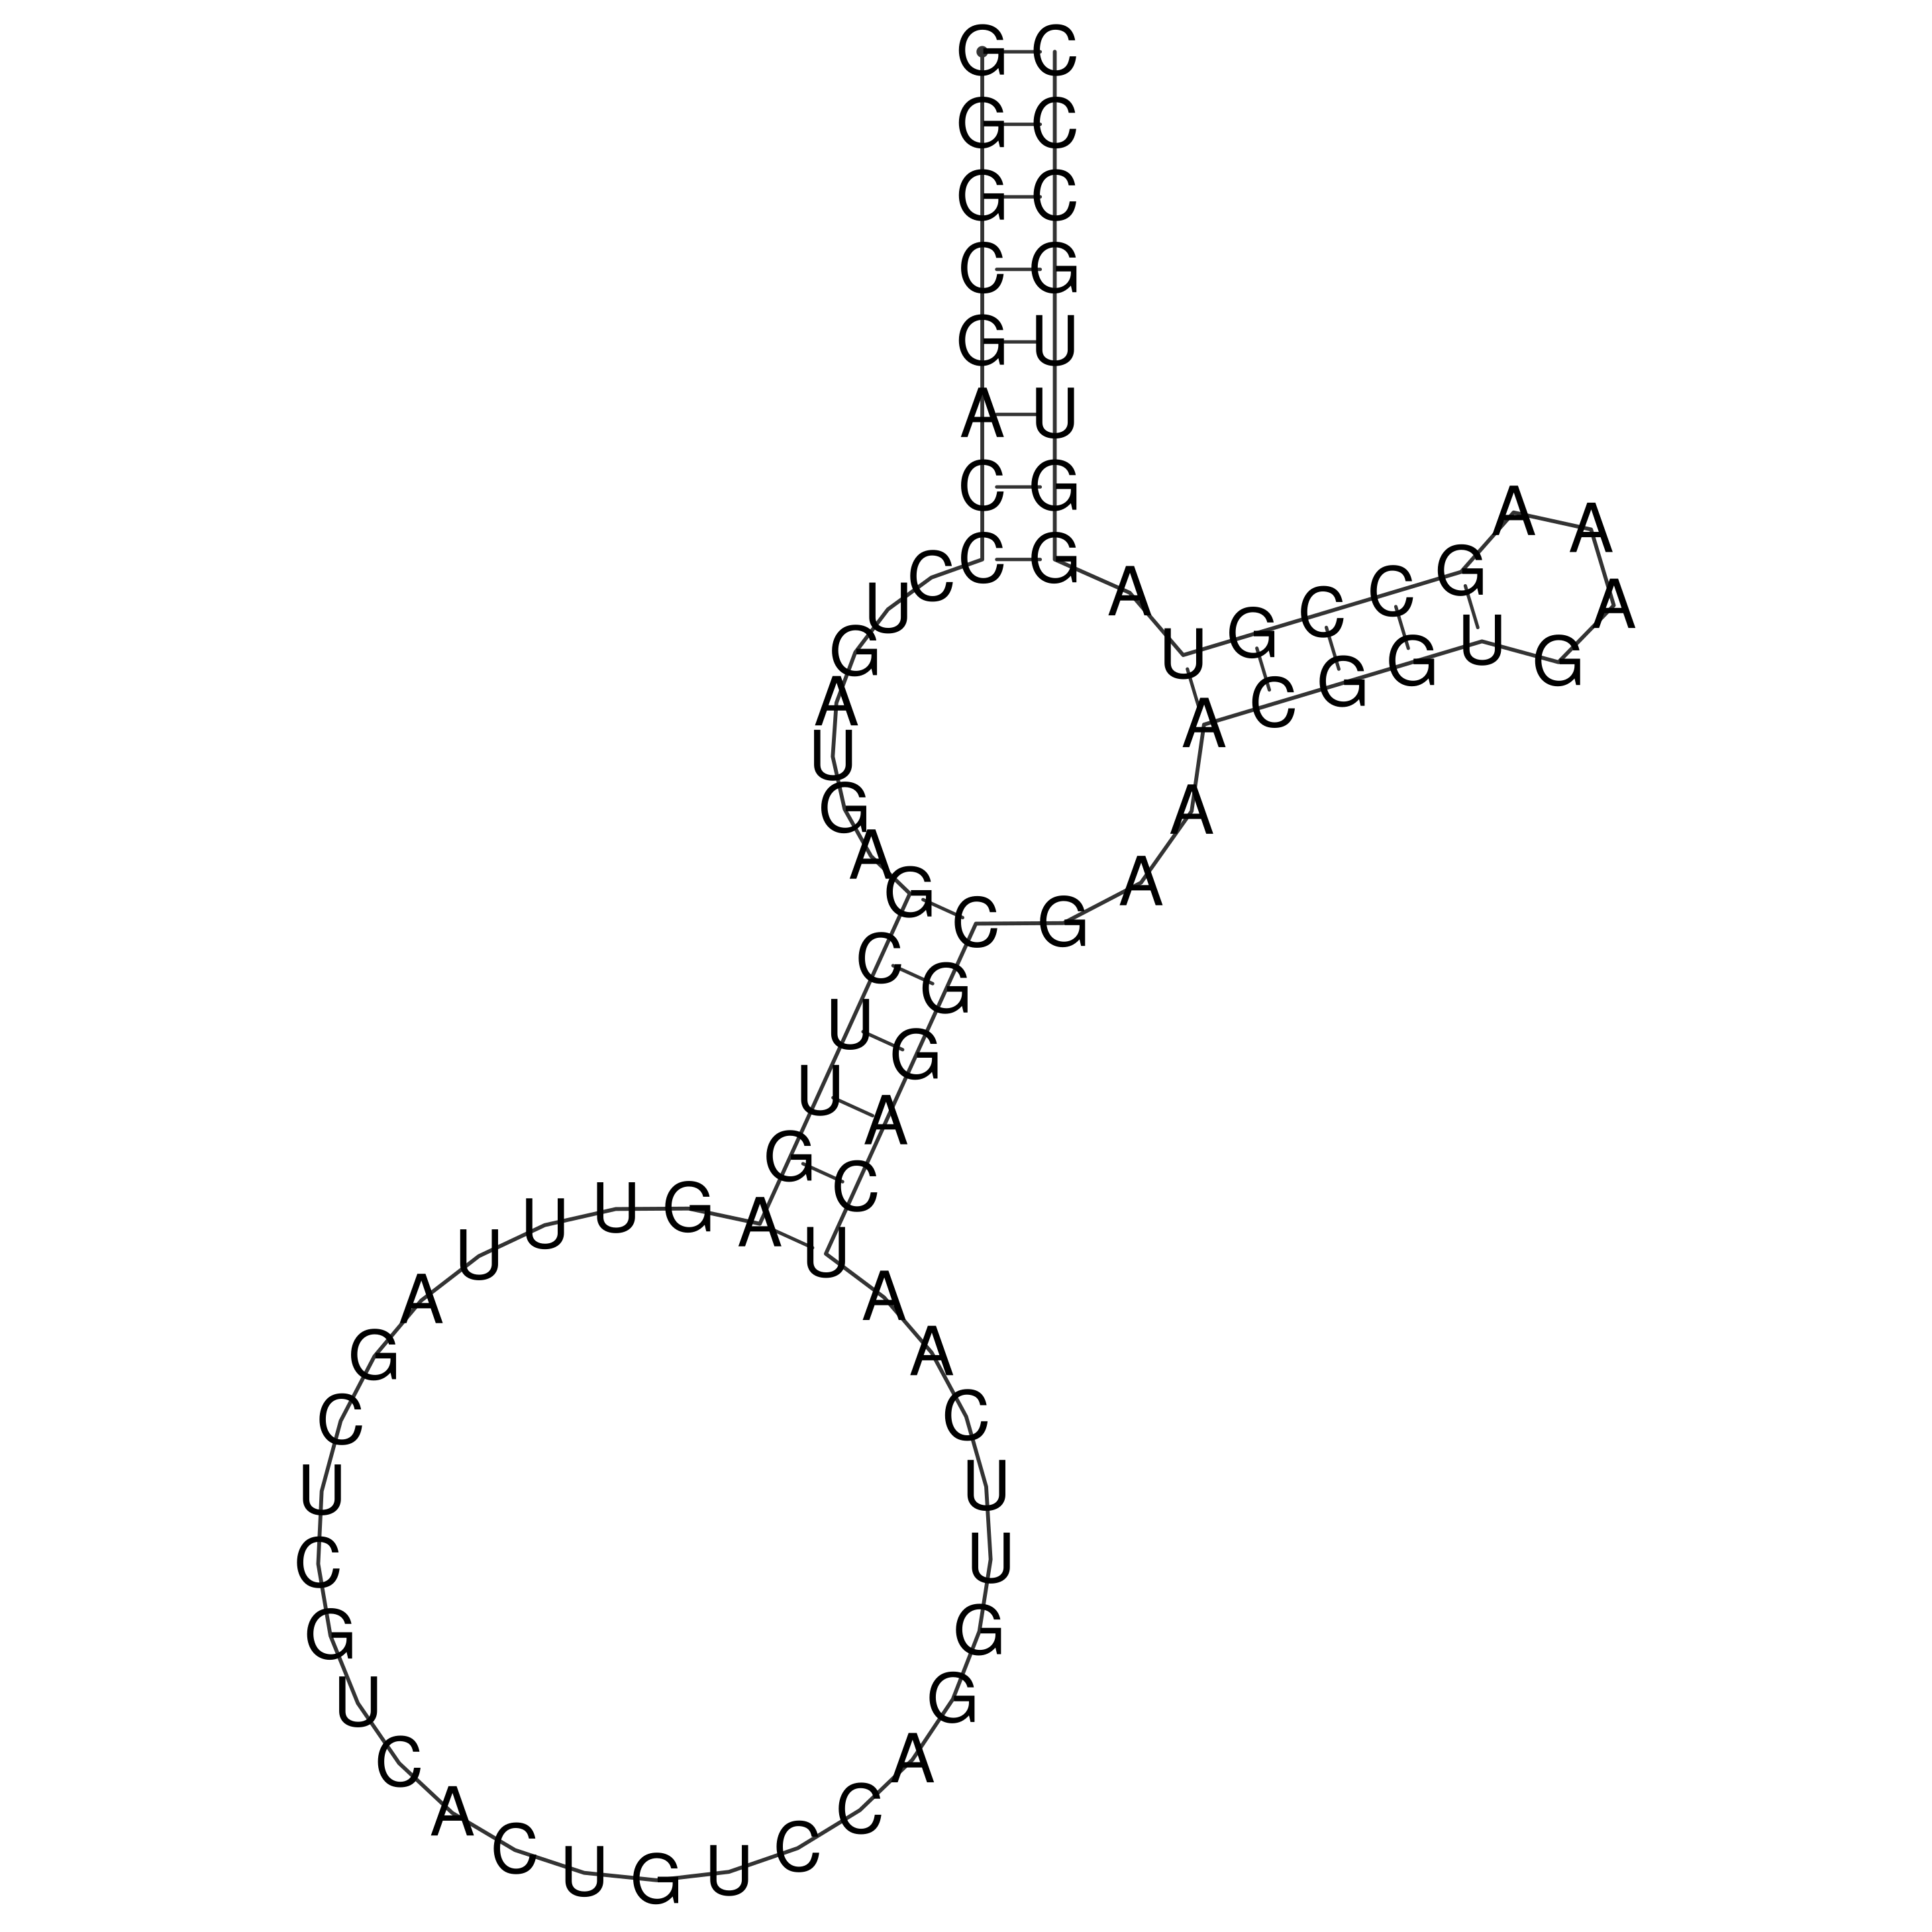

In [9]:
from IPython.display import Image
Image(filename='YES-1_OBS_ss.png')

#### Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other?
* Yes - the RNA plots are exactly the same with and without constraint. The red regions are aligned and bound to each other.

### NOT-1 CONSTRAINED

In [10]:
#NOT-1 constrained
seq = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"
bstart = 44
bend = 66
end = len(seq)

string = ">NOT-1_OBS\n" +seq+"\n"

for i in range(bstart):
    string += "."    
for i in range(bstart, bend+1):
    string += "x"    
for i in range(bend+1, end):
    string += "." 
    
string += "\n>@"
    
p = subprocess.run(['RNAfold', '-C'],
                       input=bytes(string, 'ascii'),
                      stdout=subprocess.PIPE,
                      stderr=subprocess.PIPE)


print("*** Terminal output ***")
print(p.stderr.decode())

print("*** Output file ***")
print(p.stdout.decode())

*** Terminal output ***

*** Output file ***
>NOT-1_OBS
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((...........................))))).))))))))))....)))) (-16.00)



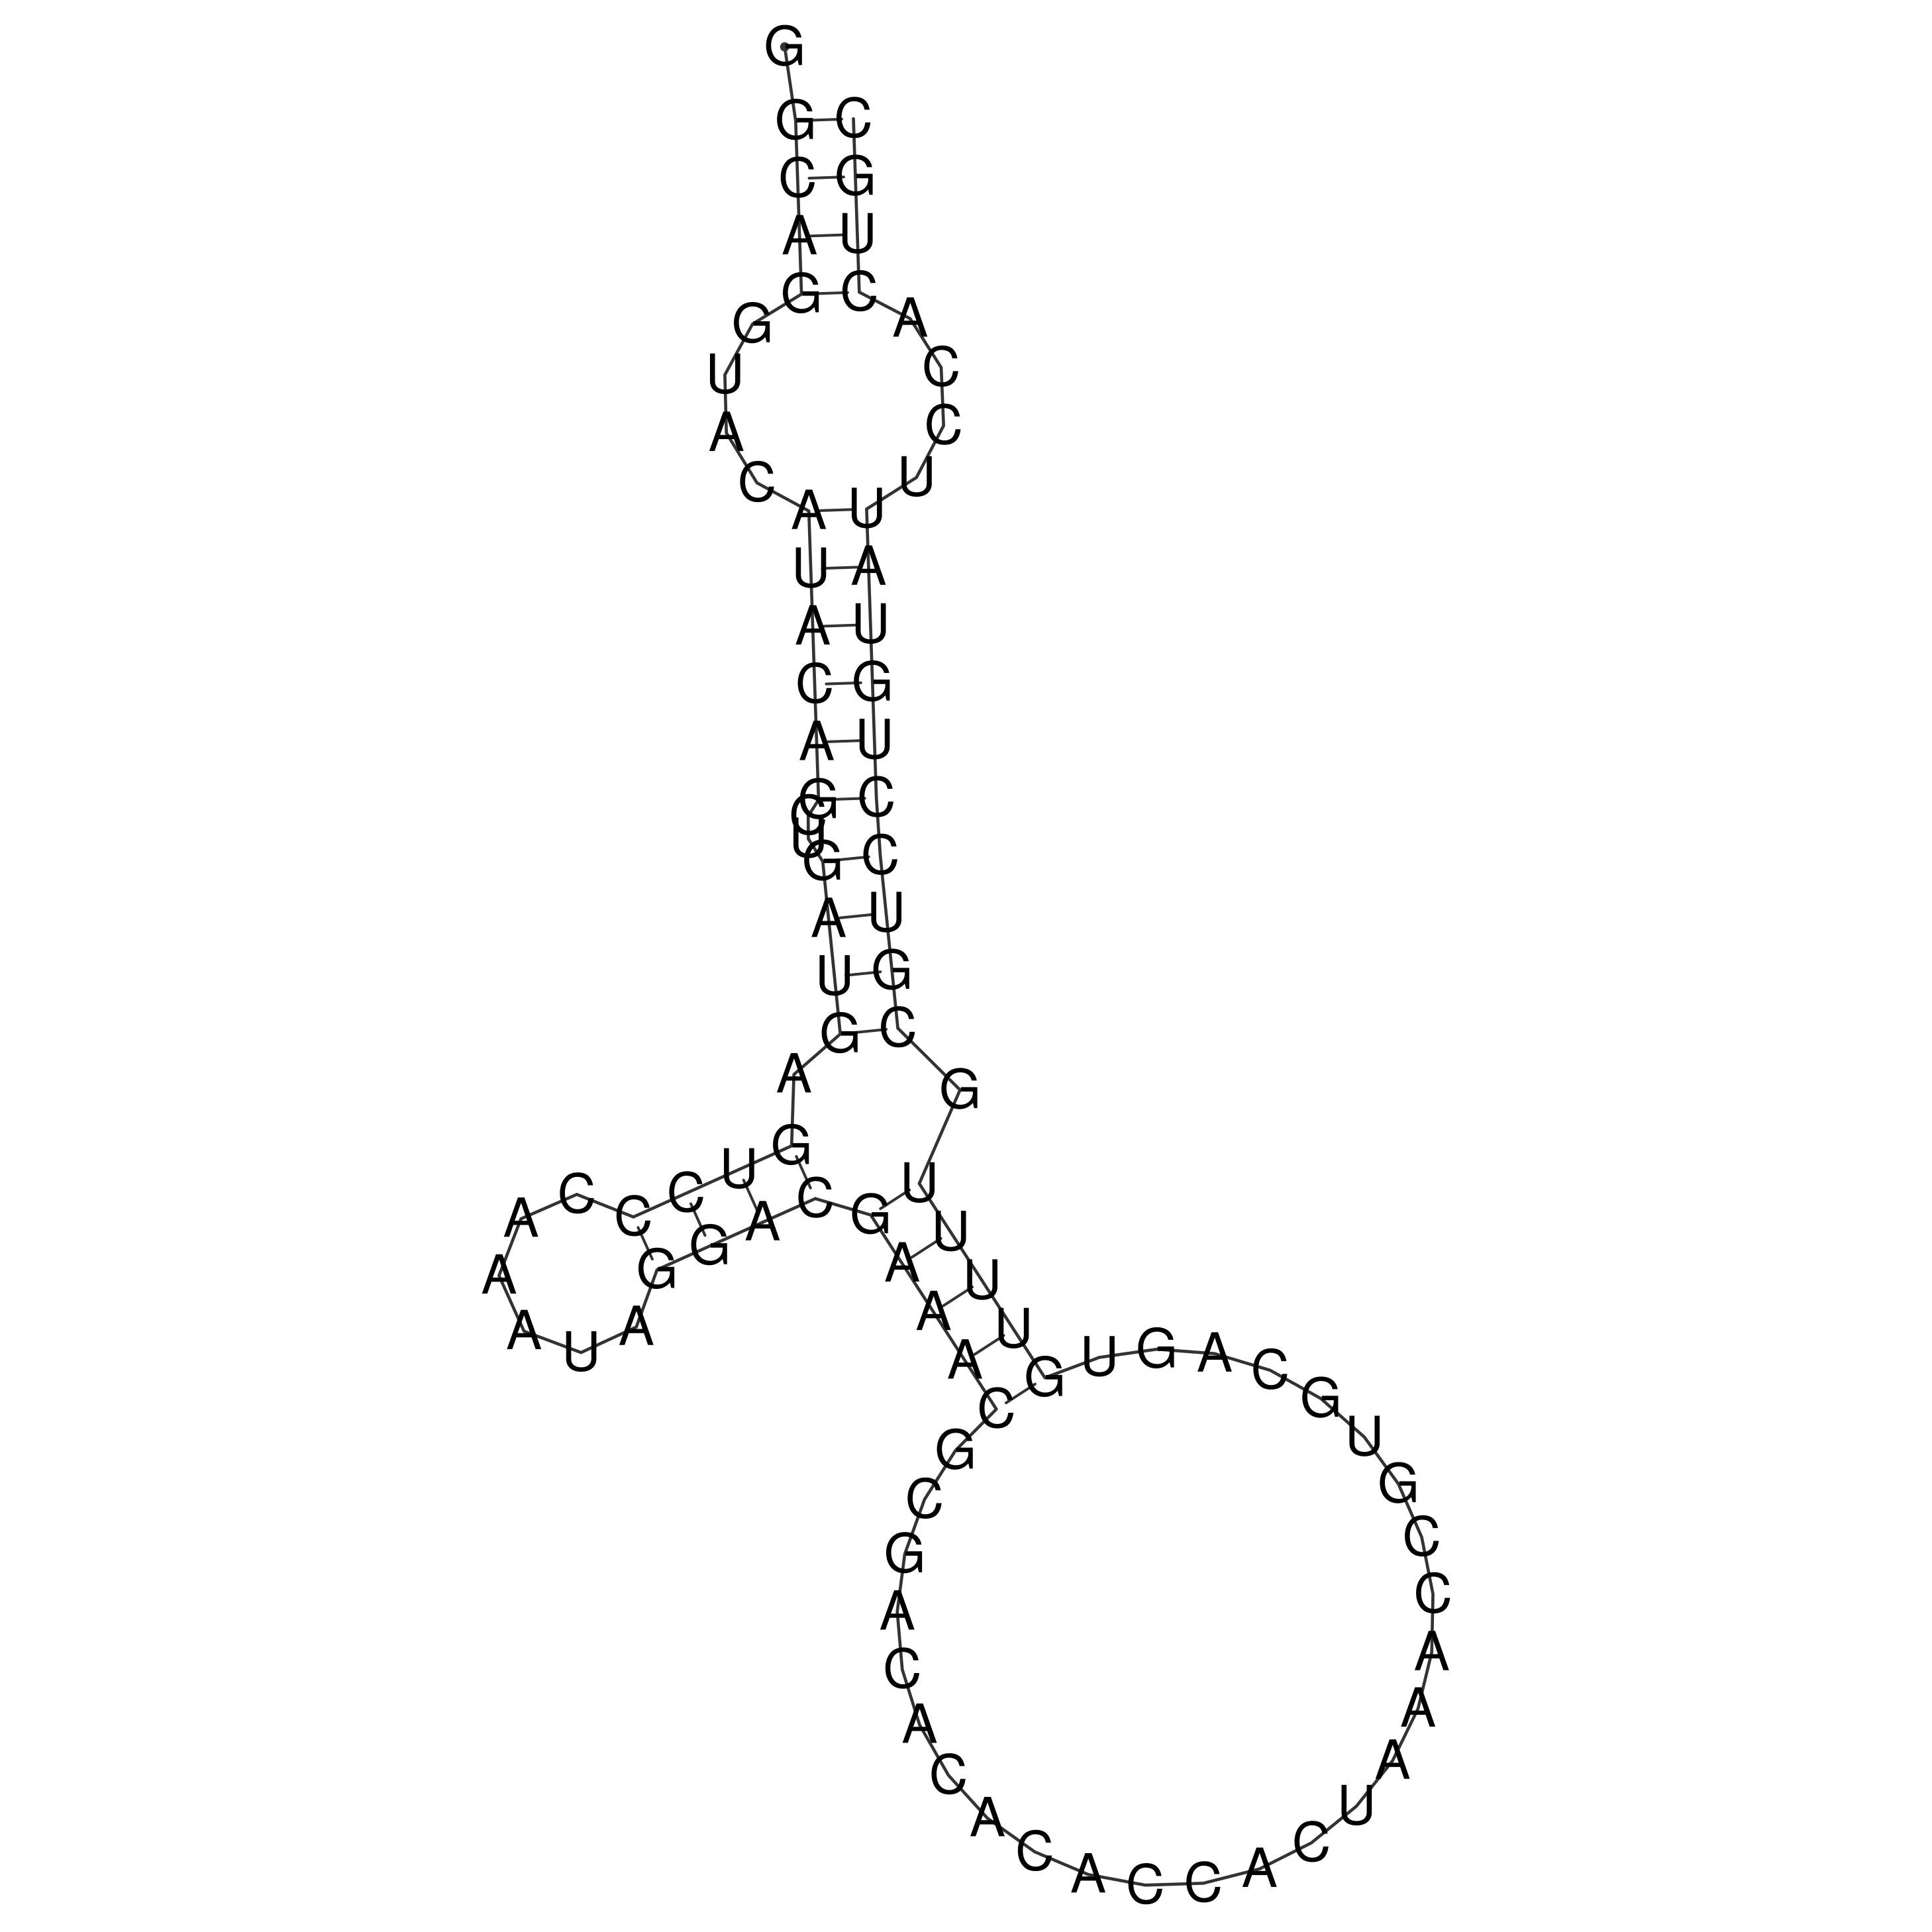

In [11]:
from IPython.display import Image
Image(filename='NOT-1_OBS_ss.png')

#### Does it look like the self-cleaving form of NOT-1 in Figure 2? Are the red regions bound to each other?
* The two red regions are not aligned/bound (the output is FALSE). In the constrained case, a pair of GU and a pair of CG are missing at position 42-43, 67-68. In the non-constrained case, the result is exactly the same as the paper. 

### AND-1 CONSTRAINED

In [12]:
# AND-1 constrained
bstart1 = 30
bend1 = 45
bstart2 = 49
bend2 = 64
end = 112

seq = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"

## T/T - creating text file for TT constraint
string = ">AND-1_TT\n"+seq+"\n"
for i in range(bstart1):
    string += "."    
for i in range(bstart1, bend1+1):
    string += "x"    
for i in range(bend1+1, bstart2):
    string += "."   
for i in range(bstart2, bend2+1):
    string += "x"    
for i in range(bend2+1, end):
    string += "."

## T/F - creating text file for TF constraint
string += "\n>AND-1_TF\n"+seq+"\n"
for i in range(bstart1):
    string += "."    
for i in range(bstart1, bend1+1):
    string += "x"    
for i in range(bend1+1, end):
    string += "."

## F/T - creating text file for FT constraint
string += "\n>AND-1_FT\n"+seq+"\n"
for i in range(bstart2):
    string += "."    
for i in range(bstart2, bend2+1):
    string += "x"    
for i in range(bend2+1, end):
    string += "."

string += "\n>@"
    
p = subprocess.run(['RNAfold', '-C'],
                       input=bytes(string, 'ascii'),
                      stdout=subprocess.PIPE,
                      stderr=subprocess.PIPE)


print("*** Terminal output ***")
print(p.stderr.decode())

print("*** Output file ***")
print(p.stdout.decode())

*** Terminal output ***

*** Output file ***
>AND-1_TT
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((................................................)))).))))).....(((((....))))).))))))))......... (-26.30)
>AND-1_TF
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)
>AND-1_FT
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((.(((....(((...(((.......))))))..))).))..................((((......))))(((((....))))).))))))))......... (-28.30)



#### CASE 1: TRUE/FALSE (only OBS-1 bound)

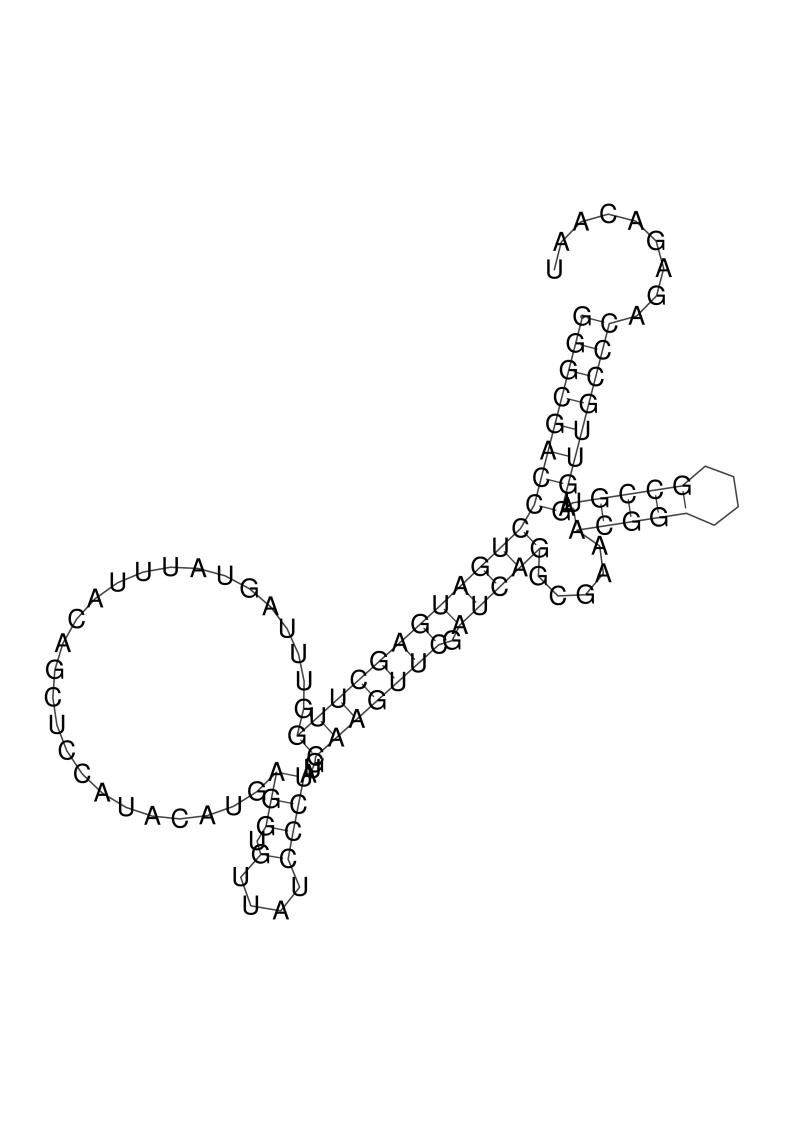

In [23]:
from IPython.display import Image
Image(filename='AND-1_TF_ss.png')

#### CASE 2: FALSE/TRUE (only OBS-2 bound)

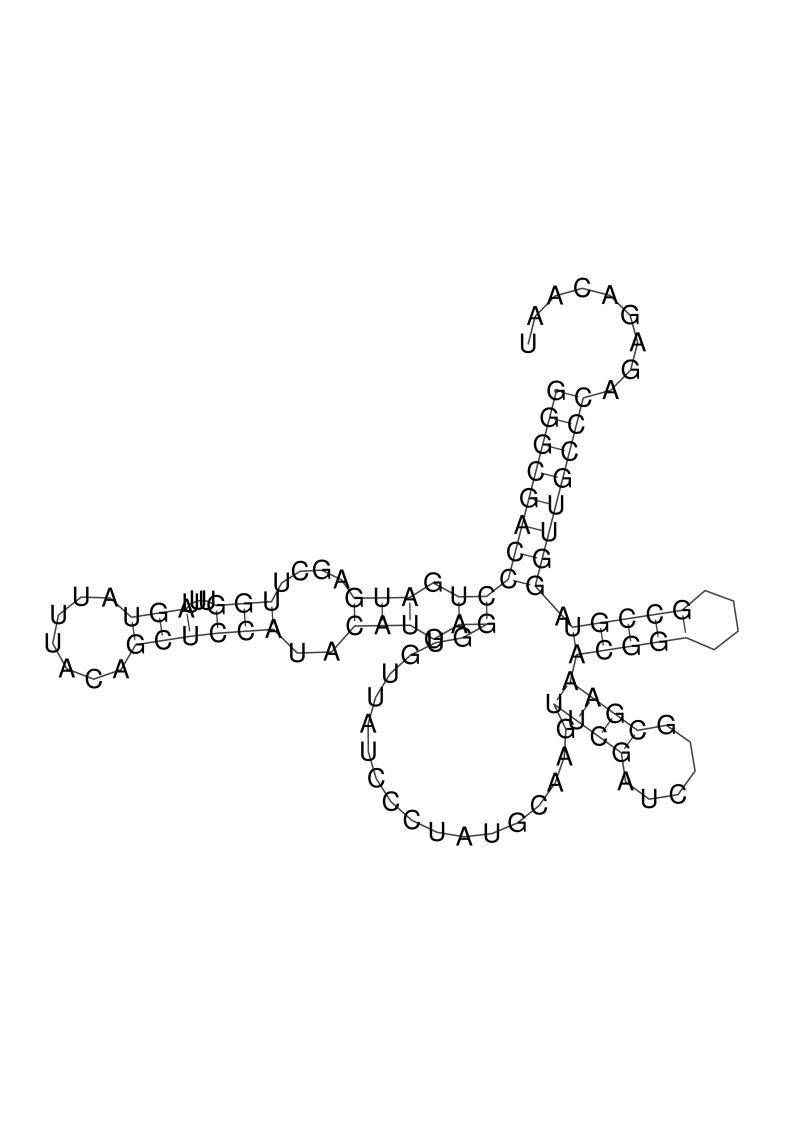

In [18]:
from IPython.display import Image
Image(filename='AND-1_FT_ss.png')

#### CASE 3: TRUE/TRUE (OBS-1 and OBS-2 Bound)

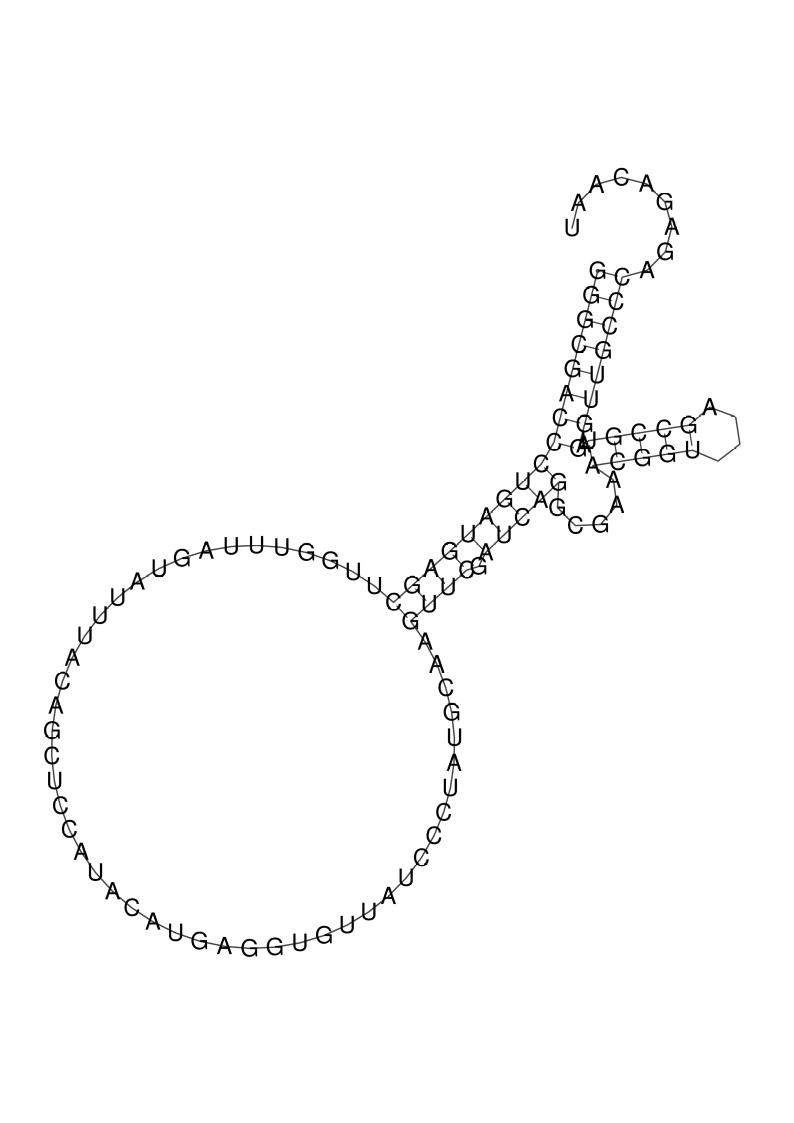

In [19]:
from IPython.display import Image
Image(filename='AND-1_TT_ss.png')

#### AND-1 truth table

|Input 1|Input 2|Output|
|------|------|------|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

#### Compare the output files to the paper. Determine whether the red regions (which you noted in your table above) pair with each other for each of the four possible input combinations.
* As seen before when neither OBS-1 or OBS-2 are bound, it is exactly the same as the paper. Both blue areas are not bound and the red areas are not aligned --> the riboswitch does not undergo cleavage.
* For the True/False case, where only OBS-1 is bound, there is a small difference in the stem formed. In my generated one, it involves nucleotides 46-60 whereas in the paper nucleotides 58-60 link to 24-26. Regardless, in both the paper and our simulation, the two red regions are not aligned. The ouput is FALSE --> riboswitch does not undergo cleavage.
* For the False/True case, where only OBS-2 is bound, the configuration is significantly different from the that in the paper. Regardless, the two red regions are not aligned in both cases --> output is FALSE
* For the True/True case, where both OBS-1 and OBS-2 are bound, our configuration is exactly the same as that in the paper. Both blue areas are bound and the red areas are aligned and bound. The output is TRUE --> the riboswitch will undergo cleavage. 

### OR-1 CONSTRAINED

In [9]:
# OR-1 constrained
bstart1 = 27
bend1 = 46
bstart2 = 47
bend2 = 66

seq = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
end = len(seq)

## T/T - creating text file for TT constraint
string = ">OR-1_TT\n"+seq+"\n"
for i in range(bstart1):
    string += "."    
for i in range(bstart1, bend1+1):
    string += "x"    
for i in range(bend1+1, bstart2):
    string += "."   
for i in range(bstart2, bend2+1):
    string += "x"    
for i in range(bend2+1, end):
    string += "."

## T/F - creating text file for TF constraint
string += "\n>OR-1_TF\n"+seq+"\n"
for i in range(bstart1):
    string += "."    
for i in range(bstart1, bend1+1):
    string += "x"    
for i in range(bend1+1, end):
    string += "."

## F/T - creating text file for FT constraint
string += "\n>OR-1_FT\n"+seq+"\n"
for i in range(bstart2):
    string += "."    
for i in range(bstart2, bend2+1):
    string += "x"    
for i in range(bend2+1, end):
    string += "."

string += "\n>@"
    
p = subprocess.run(['RNAfold', '-C'],
                       input=bytes(string, 'ascii'),
                      stdout=subprocess.PIPE,
                      stderr=subprocess.PIPE)


print("*** Terminal output ***")
print(p.stderr.decode())

print("*** Output file ***")
print(p.stdout.decode())

*** Terminal output ***

*** Output file ***
>OR-1_TT
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((((((..........................................))))))))))...(((((....))))).)))))))) (-28.84)
>OR-1_TF
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)
>OR-1_FT
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((((((..........................................))))))))))...(((((....))))).)))))))) (-28.84)



#### Case 1: True/False (only OBS-1 bound)

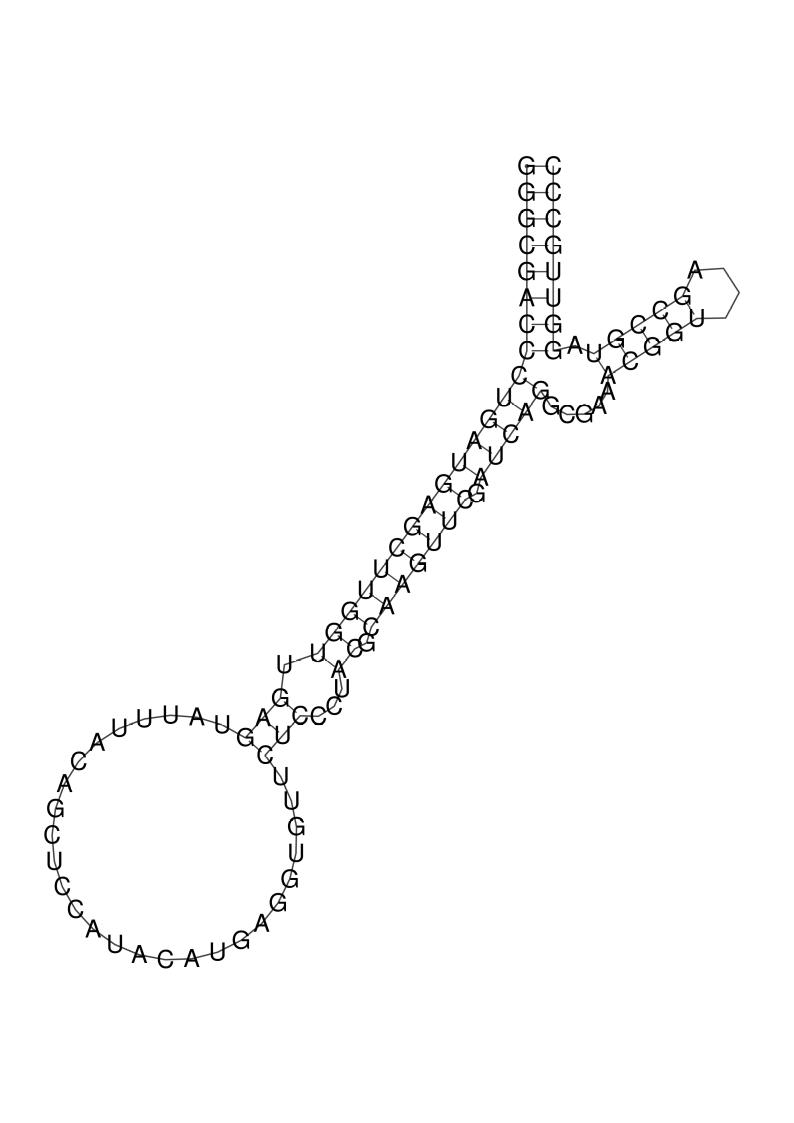

In [15]:
from IPython.display import Image
Image(filename='OR-1_TF_ss.png')

#### Case 2: False/True (only OBS-2 bound)

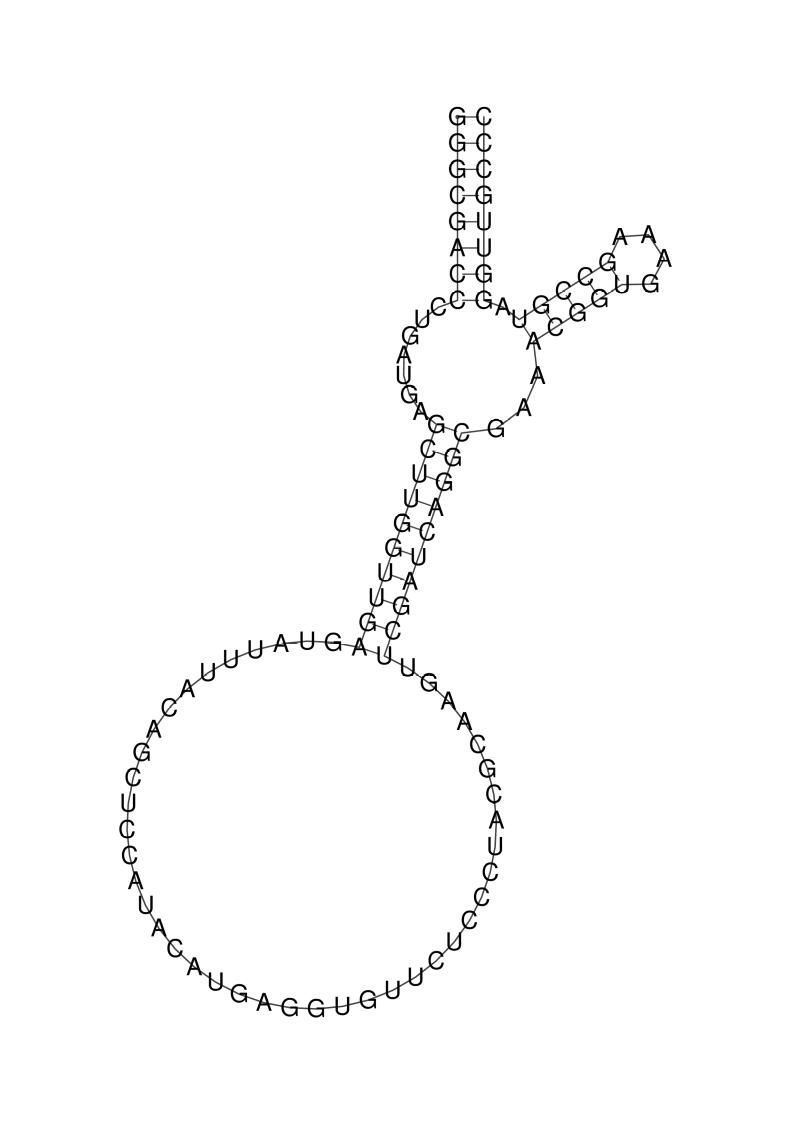

In [16]:
from IPython.display import Image
Image(filename='OR-1_FT_ss.png')

#### Case 3: True/True (both OBS-1 and OBS-2 bound)

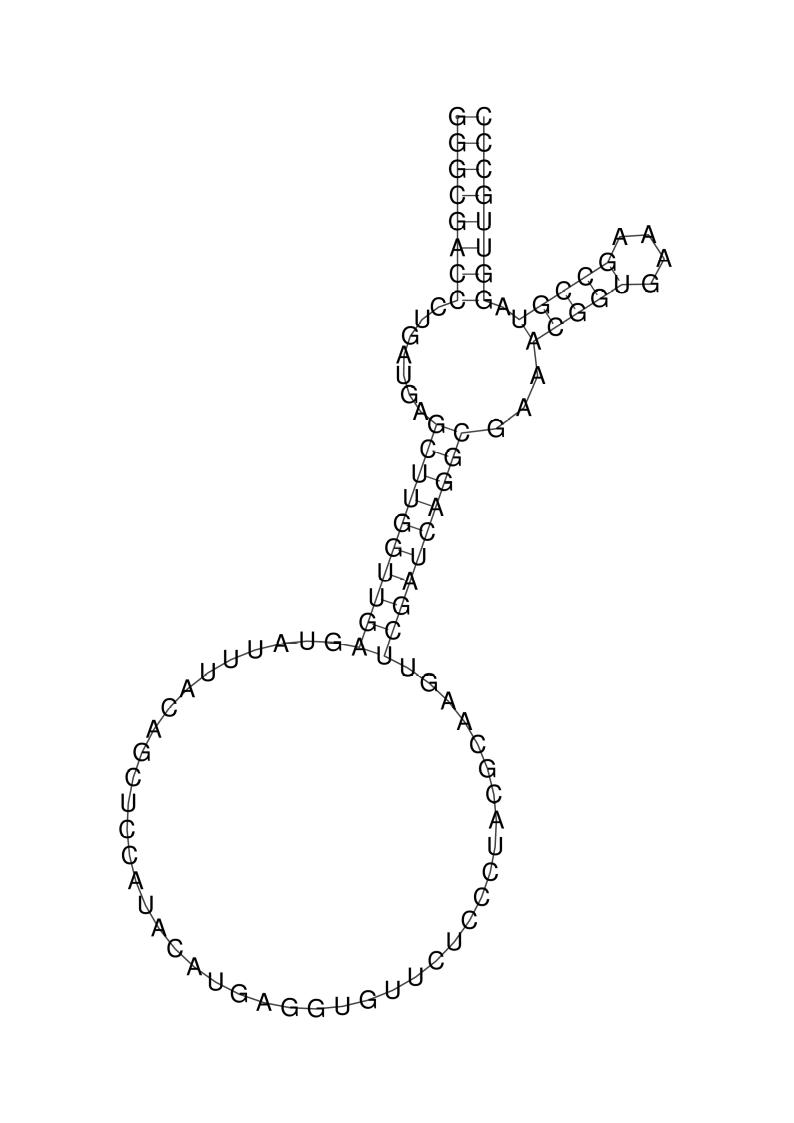

In [12]:
from IPython.display import Image
Image(filename='OR-1_TT.png')

#### OR-1 truth table obtained in our simulations

**Please see description in next cell for why output is FALSE in our case even if OBS-1 or OBS-2 is bound. This differs from the paper and in an ideal OR gate.**

|Input 1|Input 2|Output|
|------|------|------|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

#### Compare the output files to the paper. Determine whether the red regions (which you noted in your table above) pair with each other for each of the four possible input combinations.
* As seen before when neither OBS-1 or OBS-2 are bound, it is exactly the same as the paper. Both blue areas are not bound and the red areas are not aligned --> the riboswitch does not undergo cleavage.
* For the True/False case, where only OBS-1 is bound, the results are very different from that in the paper. The two red regions are not aligned at all. In one of the stems, there is a signficiant shift in base pairing. Unlike what was presented in the paper, because the red regions are not aligned, the corresponding output result is FALSE in our simulation. 
* For the False/True case, where only OBS-2 is bound, my configuration is slightly different than that in the paper - shift in the second blue region, and a subsequent shift in the red region alignment. Thus, unlike the paper, the output is likely to be FALSE. 
* For the True/True case, where both OBS-1 and OBS-2 are bound, the result is nearly identical to that of the paper. My result does notpair nucleotides 26 and 67 (paper pairs G and U). The output is TRUE in both cases. 

## According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims? 

* YES-1, NOT-1, and AND-1 work as the paper claims (diregarding a few structural features and focusing on the red-region alignment). The claims in the True/False and False/True cases for the OR-1 riboswitch does not work as claimed. Specification of technicalities regarding folding parameters from the paper may change the output of these plots to align with the paper. 

## END OF LAB 5